In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import pandas as pd
df = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
st = 'HI all ,Welcome to ETLHive!...'

In [6]:
st2 = st.lower()
st2

'hi all ,welcome to etlhive!...'

In [12]:
import re
st3 = re.sub("[^a-z ]", "", st2)
st3

'hi all welcome to etlhive'

In [13]:
def preprocess_text(st):
    st2 = st.lower()
    st3 = re.sub("[^a-z]", "", st2)
    return st3


In [14]:
df['pre'] = df['Review'].apply(preprocess_text)

In [17]:
df

,Review,Liked,pre
0,Wow... Loved this place.,1,wowlovedthisplace
1,Crust is not good.,0,crustisnotgood
2,Not tasty and the texture was just nasty.,0,nottastyandthetexturewasjustnasty
3,Stopped by during the late May bank holiday of...,1,stoppedbyduringthelatemaybankholidayoffrickste...
4,The selection on the menu was great and so wer...,1,theselectiononthemenuwasgreatandsoweretheprices
...,...,...,...
995,I think food should have flavor and texture an...,0,ithinkfoodshouldhaveflavorandtextureandbothwer...
996,Appetite instantly gone.,0,appetiteinstantlygone
997,Overall I was not impressed and would not go b...,0,overalliwasnotimpressedandwouldnotgoback
998,"The whole experience was underwhelming, and I ...",0,thewholeexperiencewasunderwhelmingandithinkwel...


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
X_pre = tf.fit_transform(df['pre']).toarray()
X_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
X_pre.shape

(1000, 995)

In [22]:
Y = df['Liked']
Y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=21)

In [25]:
xtrain.shape

(800, 995)

In [26]:
xtest.shape

(200, 995)

In [29]:
xtrain.shape[1]

995

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Input
from keras.callbacks import EarlyStopping

In [32]:
model = Sequential()

In [36]:
model.add(Input(shape=(xtrain.shape[1],)))

In [38]:
model.add(Dense(units=128, activation='relu'))

In [40]:
model.add(Dropout(rate=0.5))

In [42]:
model.add(Dense(units=64, activation='relu'))

In [44]:
model.add(Dropout(rate=0.4))

In [45]:
model.add(Dense(1, activation='sigmoid'))

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               127488    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 135809 (530.50 KB)
Trainable params: 135809 (530.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
es = EarlyStopping(monitor='val_loss', patience=15)

In [49]:
hist = model.fit(xtrain, ytrain, validation_split=0.1, epochs=100, callbacks=[es])

Epoch 1/100


23/23 [==============================] - 1s 12ms/step - loss: 0.6929 - accuracy: 0.5167 - val_loss: 0.6961 - val_accuracy: 0.5000
Epoch 2/100
23/23 [==============================] - 0s 8ms/step - loss: 0.6902 - accuracy: 0.5361 - val_loss: 0.6962 - val_accuracy: 0.4250
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6821 - accuracy: 0.5931 - val_loss: 0.6993 - val_accuracy: 0.4500
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6727 - accuracy: 0.6125 - val_loss: 0.7028 - val_accuracy: 0.4500
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6532 - accuracy: 0.6944 - val_loss: 0.7049 - val_accuracy: 0.4750
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6106 - accuracy: 0.8181 - val_loss: 0.7047 - val_accuracy: 0.4750
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.5439 - accuracy: 0.8653 - val_loss: 0.7167 - val_accuracy: 0.4750
Epoch 8/10

In [50]:
model.evaluate(xtrain, ytrain)

25/25 [==============================] - 0s 2ms/step - loss: 0.0851 - accuracy: 0.9463


[0.08506844192743301, 0.9462500214576721]

In [51]:
model.evaluate(xtest, ytest)

7/7 [==============================] - 0s 3ms/step - loss: 0.7505 - accuracy: 0.5100


[0.7504642605781555, 0.5099999904632568]

In [53]:
yprob_tr = model.predict(xtrain)
yprob_ts = model.predict(xtest)

7/7 [==============================] - 0s 183us/step


In [72]:

ypred_train = [1 if prob>0.5 else 0 for prob in yprob_tr]
ypred_train[0:5]

[0, 1, 0, 0, 1]

In [66]:
ypred_test = [1 if prob>0.5 else 0 for prob in yprob_ts]
ypred_test[0:5]

[0, 0, 1, 1, 0]

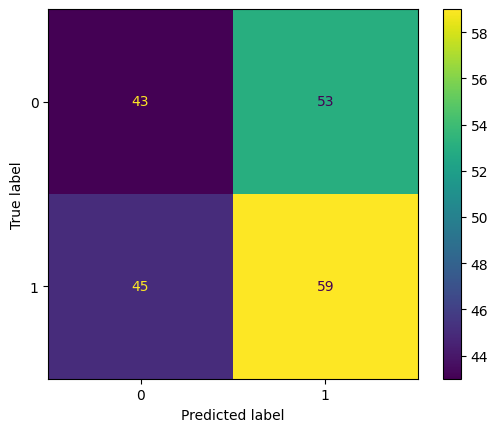

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

In [76]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.49      0.45      0.47        96
           1       0.53      0.57      0.55       104

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.51      0.51       200



In [77]:
def predict_sentiment(model, tf):
  st = input("Please enter the review : ")
  st2 = preprocess_text(st)
  xnew = tf.transform([st2]).toarray()
  prob = model.predict([xnew])
  print(f'Probability that statement is positive : {prob}')
  if prob>=0.5:
    print('The given Review is POSITIVE')
  else:
    print('The given Review is NEGATIVE')

In [80]:
predict_sentiment(model, tf)

1/1 [==============================] - 0s 50ms/step
Probability that statement is positive : [[0.69089067]]
The given Review is POSITIVE


In [82]:
model.save('sentimentreview.keras')

In [83]:
from keras.models import load_model
lm = load_model('sentimentreview.keras')
lm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               127488    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 135809 (530.50 KB)
Trainable params: 135809 (530.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
